# Project 2 : Investigate TMDB Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

<h3>This dataset contains some information about 10,000 movies collected from The Movie Database (TMDb).</h3>
I will be exploring this data and try to extract some useful information based on my analysis for this data.

<h3>Here is a list of the questions I'm planning to investigate:</h3>

1. What genre of movies has the top popularity of all time?

2. What is the number of movies released per year? "Dump Months"

3. What is the number of movies released per year?

4. What are the top 10 Movies that received highest revenue?

5. Which actor had the most starring roles?

6. Is there a relation between the profit of the movie and other attributes? i.e. budget, runtime, voting

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

Let's start by having an overview on the data and it's attributes.

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df= pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<hr style="width:90%;text-align:left;margin-center:0">

<a id='wrangling'></a>
## Data Wrangling

### After having a quick overview on the data, I find that the raw dataset consists of 10866 rows and 21 columns.

##### In the coming steps, I will explore more about the general properties of the dataset:

In [3]:
#Check the number of rows and columns
df.shape

(10866, 21)

In [4]:
# Load data and fit all columns visible in the notebook for better clarity on all attribute values
pd.set_option('display.max_columns', df.shape[1])
pd.set_option('display.max_colwidth', 35)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|v...,Twenty-two years after the even...,124,Action|Adventure|Science Fictio...,Universal Studios|Amblin Entert...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh ...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|d...,An apocalyptic story set in the...,120,Action|Adventure|Science Fictio...,Village Roadshow Pictures|Kenne...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kat...,http://www.thedivergentseries.m...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dysto...,Beatrice Prior must confront he...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carri...,http://www.starwars.com/films/s...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space op...,Thirty years after defeating th...,136,Action|Adventure|Science Fictio...,Lucasfilm|Truenorth Productions...,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason St...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense...,Deckard Shaw seeks revenge agai...,137,Action|Crime|Thriller,Universal Pictures|Original Fil...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
# Check data types of the attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
#Check for duplicate values
sum(df.duplicated())

1

In [7]:
#Check for null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

#### --------- Data Wrangling Findings --------

From the data wrangling, I could observe the following points:
- There is only one duplicate row which can be easily removed
- Some columns contain null values as: cast and genres
- Some columns have  incorrect data types that need to be fixed 

<hr style="width:90%;text-align:left;margin-center:0">

## Data Cleaning

<p style="font-size:16px">First, I will drop all unnecessary attribute that I will not use in my analysis process:</p>

In [8]:
#drop  unnecessary attributes (inplace)
df.drop(['imdb_id','tagline','homepage', 'keywords', 'overview', 'budget_adj','revenue_adj','director', 'production_companies'], axis=1, inplace=True)
df.shape

(10866, 12)

In [9]:
pd.set_option('display.max_columns', 12)
df.head()

,id,popularity,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard...,124,Action|Adventure|Science Fictio...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh ...,120,Action|Adventure|Science Fictio...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kat...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carri...,136,Action|Adventure|Science Fictio...,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason St...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


<p style="font-size:16px">Then I will rename the column names to look more consistent:</p>

In [10]:
df.columns = df.columns.str.title()

<p style="font-size:16px">And then asign proper data types to date column as folllows:</p>

In [11]:
df['Release_Date']=pd.to_datetime(df['Release_Date'])
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              10866 non-null  int64         
 1   Popularity      10866 non-null  float64       
 2   Budget          10866 non-null  int64         
 3   Revenue         10866 non-null  int64         
 4   Original_Title  10866 non-null  object        
 5   Cast            10790 non-null  object        
 6   Runtime         10866 non-null  int64         
 7   Genres          10843 non-null  object        
 8   Release_Date    10866 non-null  datetime64[ns]
 9   Vote_Count      10866 non-null  int64         
 10  Vote_Average    10866 non-null  float64       
 11  Release_Year    10866 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1018.8+ KB


(10866, 12)

In [12]:
df.isnull().sum()

Id                 0
Popularity         0
Budget             0
Revenue            0
Original_Title     0
Cast              76
Runtime            0
Genres            23
Release_Date       0
Vote_Count         0
Vote_Average       0
Release_Year       0
dtype: int64

<p style="font-size:16px">To avoid any data misinterpretation, I will drop null values since the count is low:</p>

In [13]:
#drop null values
df.dropna(inplace=True)

In [14]:
df.shape

(10768, 12)

<p style="font-size:16px">Then drop the duplicate records</p>

In [15]:
#Drop Duplicates from dataset
df.drop_duplicates(inplace=True)
df.shape

(10767, 12)

<p style="font-size:16px">Finaly, remove unwanted data from attributes to ease the analysis process </p>

In [16]:
df['Genres']= df['Genres'].str.replace("\|.*",'', regex=True)

<p style="font-size:20px; text-align:center;"> -------  Final Dataset after Cleaning  -----------</p>

In [17]:
#Final Dataset after cleaning
pd.set_option('display.max_columns', df.shape[1])
pd.set_option('display.max_colwidth', 60)
df.head()

,Id,Popularity,Budget,Revenue,Original_Title,Cast,Runtime,Genres,Release_Date,Vote_Count,Vote_Average,Release_Year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'On...,124,Action,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Houl...,120,Action,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Mi...,119,Adventure,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam Driver|Dais...,136,Action,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle Rodriguez|...,137,Action,2015-04-01,2947,7.3,2015


<hr style="width:90%;text-align:left;margin-center:0">

<a id='eda'></a>
## Exploratory Data Analysis

 In thhis section, I will perform analysis based on the questions I stated earlier:

### Research Question 1: What genre of movies has the top popularity of all time?

In [18]:
# group data by Genre 
popular_genre = df.groupby(['Genres']).count().sort_values(by=['Popularity'], ascending = False)

popular_genre=pd.DataFrame(popular_genre).reset_index()


In [19]:
#Created function to fill bar plot attributes faster

def bar_Plot(_df,x_ax, y_ax, plt_title,x_title, y_title, plt_style,plt_palette):
    sns.set_theme(style=plt_style, palette=plt_palette);
    _df.plot( kind= 'bar',linewidth=5, width=0.5,x=x_ax, y=y_ax, figsize=(30,10), fontsize=15);
    plt.title(plt_title,fontsize = 30);
    plt.xlabel(x_title,fontsize = 20);
    plt.ylabel(y_title,fontsize = 20);


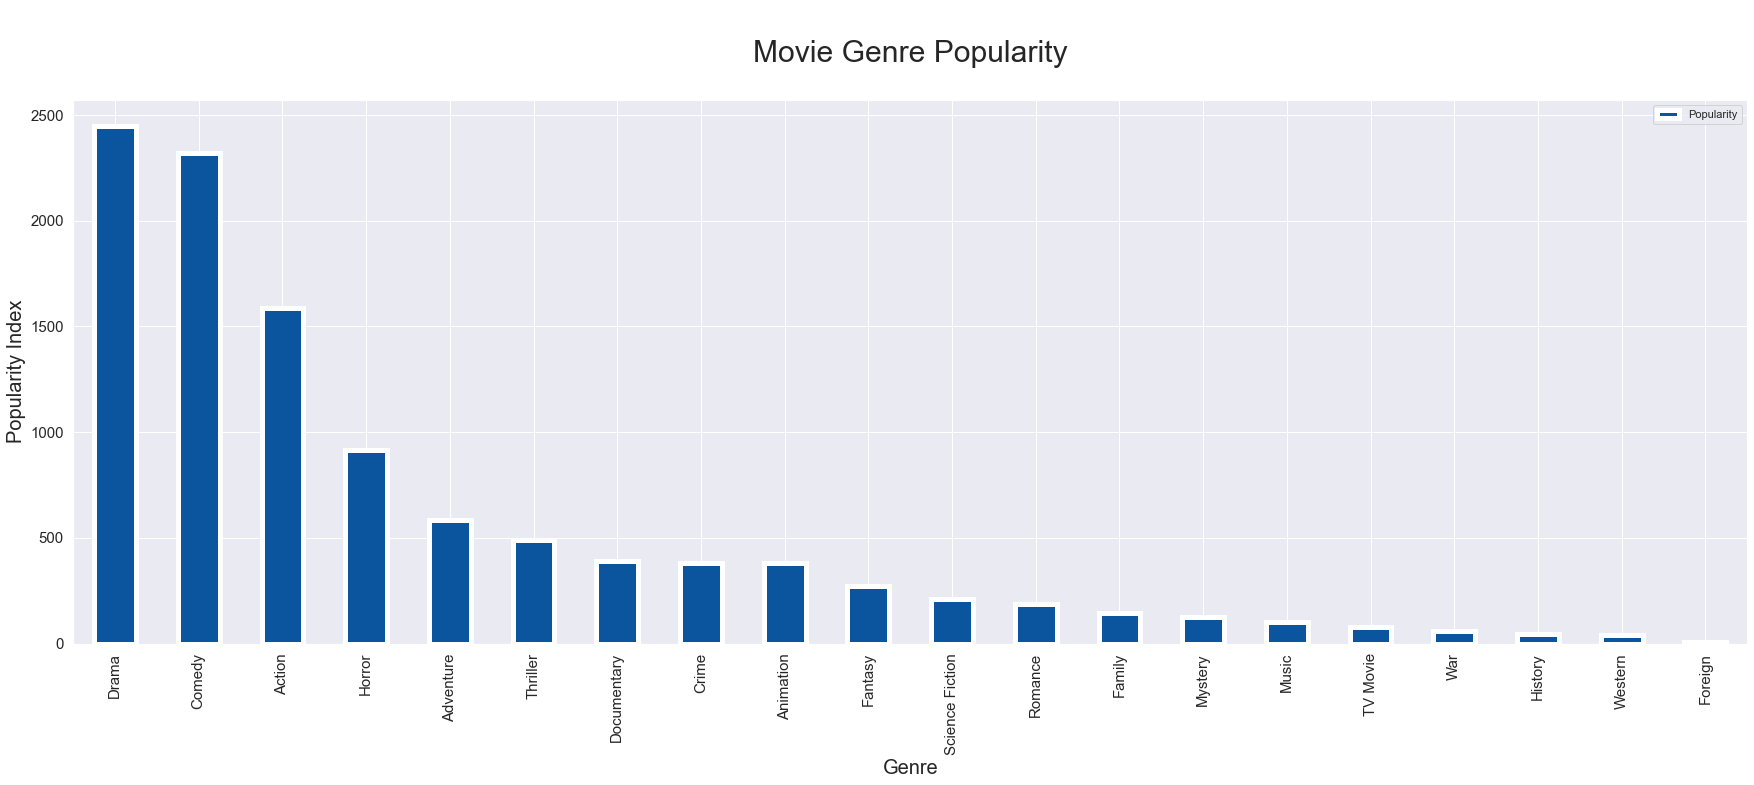

In [20]:
#plot data- call bar plot function
bar_Plot(popular_genre,'Genres','Popularity','\nMovie Genre Popularity\n','Genre','Popularity Index','darkgrid','Blues_r') 

> <p>From the chart, I can deduce that the top genre of all time is <strong>Drama Movies</strong>.</p>

<hr style="width:80%;margin-center:0;height:2px">

### Research Question 2 : What is the number of movies released per year? "Dump Months"

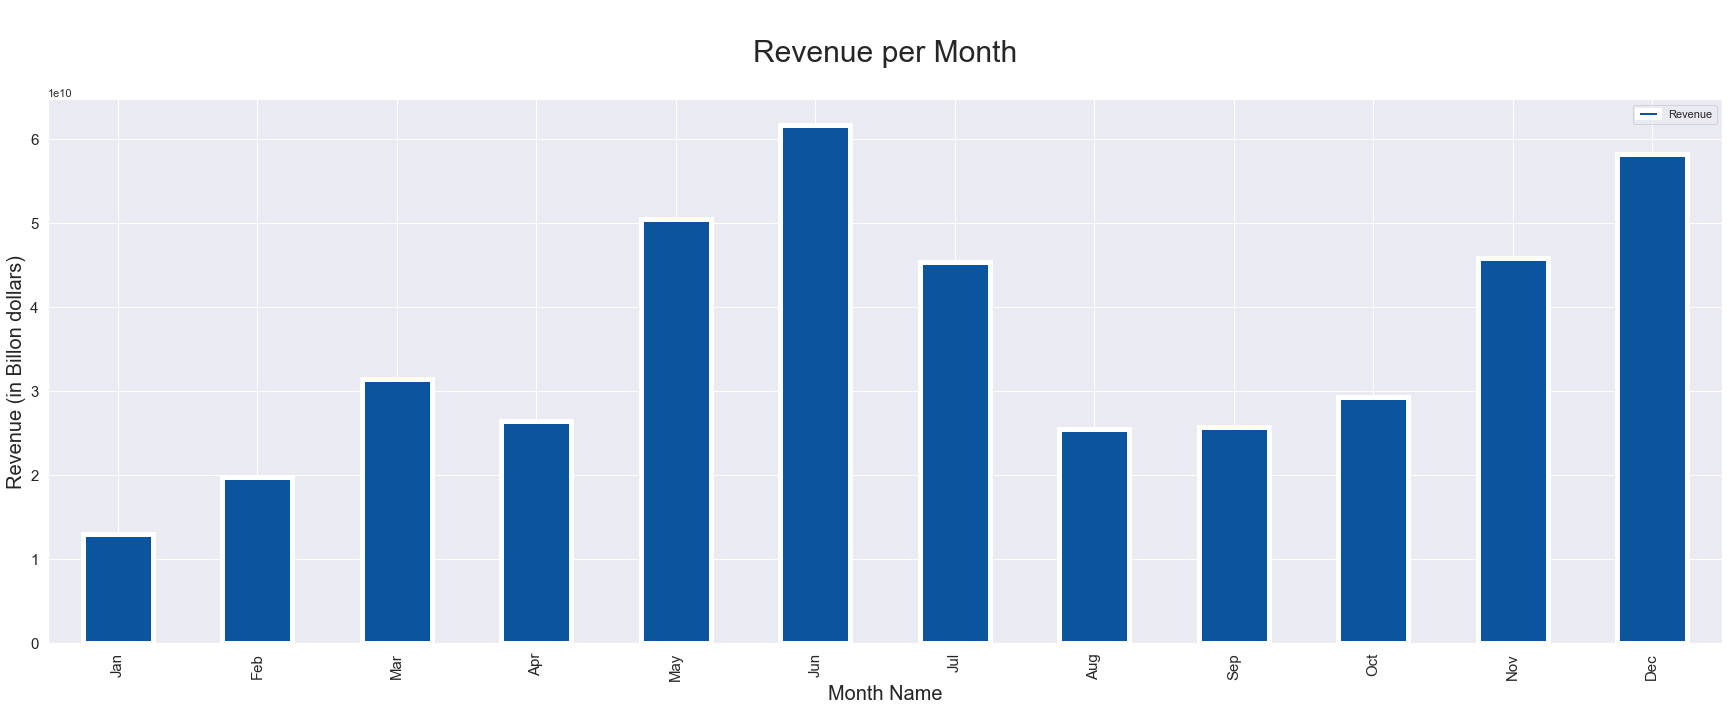

In [21]:
#create column for month index extracted from Release_Date column
df['Month_Index']=df['Release_Date'].dt.month

#group by month index
revenue_month=df.groupby(['Month_Index']).sum(['Revenue']).sort_values(by=['Month_Index'])
revenue_month.reset_index(inplace=True)

#convert index to datetime then extract month name and add abbreviation on month name 
revenue_month['Month_Name']= pd.to_datetime(revenue_month['Month_Index'], format='%m').dt.month_name().str.slice(stop=3)

#set month names as index to plot months in chronological order
x_ax=revenue_month.set_index('Month_Name', inplace=True)

#plot data- call bar plot function
bar_Plot(revenue_month,x_ax,'Revenue','\nRevenue per Month\n','Month Name','Revenue (in Billon dollars)', 'darkgrid','Blues_r')        


> <p>Highest Grossing Movies are months June and December, while the ones which achieced the lowest revenue were release in January and September. This agrees with the theory of <strong>Dump Months</strong>!</p>

<hr style="width:80%;margin-center:0;height:2px">

### Research Question 3 : What is the number of movies released per year?

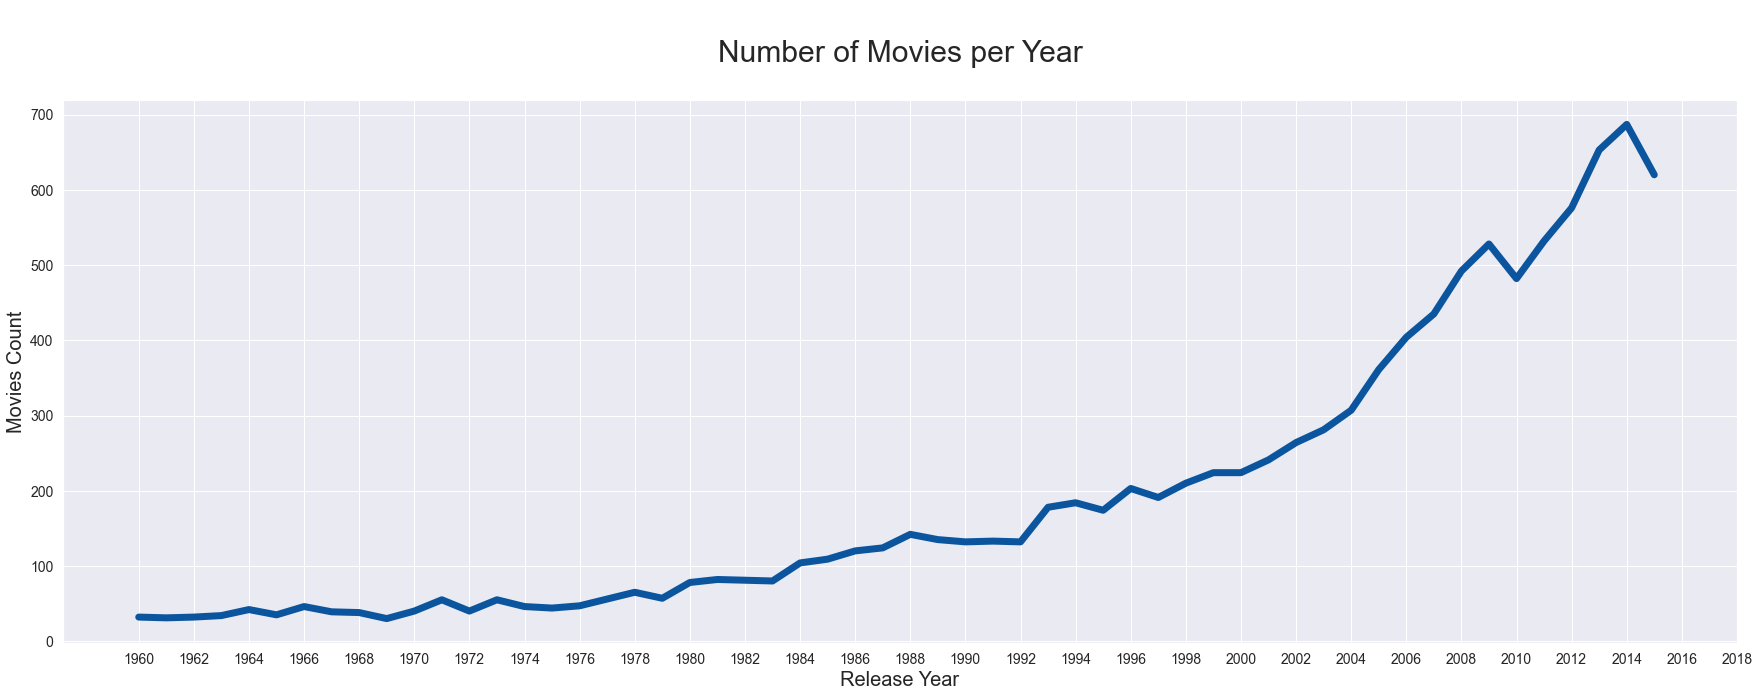

In [22]:
movie_year=df.groupby('Release_Year').count()['Original_Title']
movie_year
sns.set_theme(style='darkgrid', palette='Blues_r');
movie_year.plot( xticks = np.arange(1960,2020,2), kind= 'line',linewidth=7, y='Original_Title', figsize=(30,10), fontsize=14);
plt.title('\nNumber of Movies per Year\n',fontsize = 30);
plt.xlabel('Release Year',fontsize = 20);
plt.ylabel('Movies Count',fontsize = 20);


> <p>Number of movies release increase gradually year by year. However, a noticable drop in releases happened in year <strong>2010</strong>and again in <strong>2015</strong>!</p>

<hr style="width:80%;margin-center:0;height:2px">

### Research Question 4 : What are the top 10 Movies that received highest revenue?

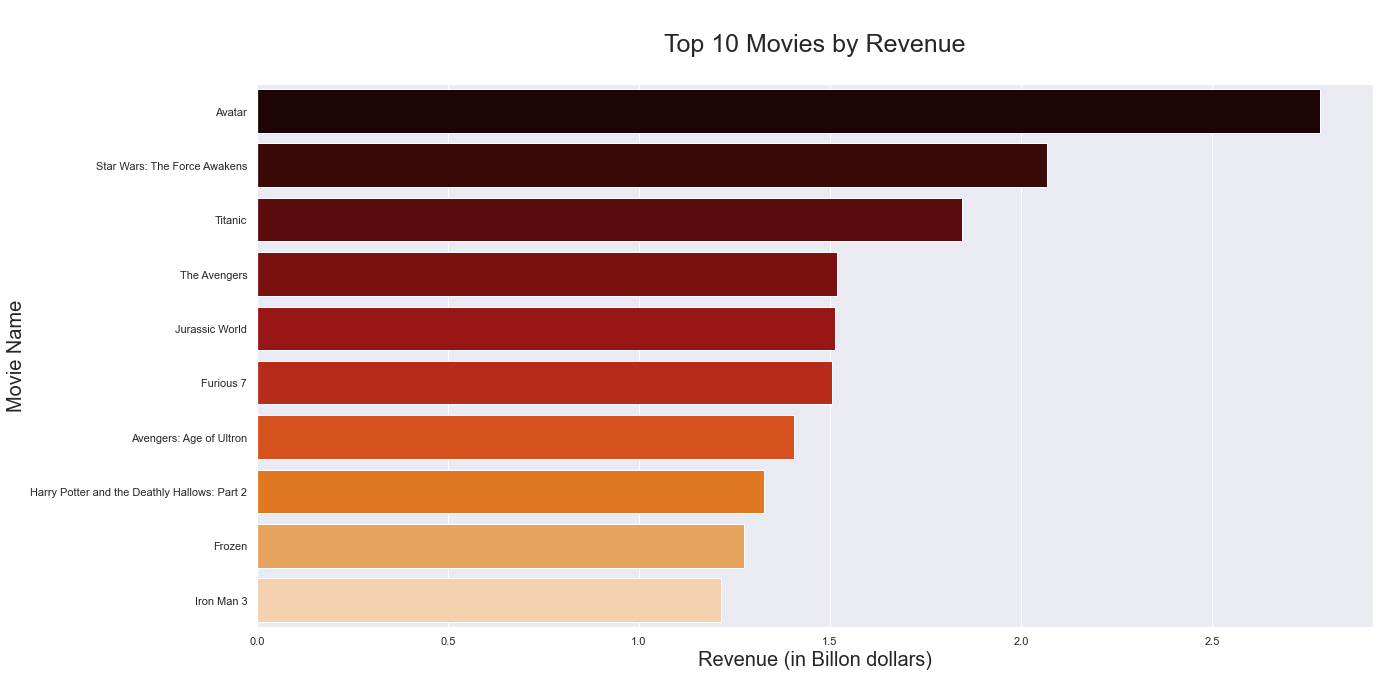

In [23]:
#Reference: https://seaborn.pydata.org/examples/part_whole_bars.html
#create dataframe with the first 10 records only
hi_revenue = df.sort_values(by=['Revenue'], ascending = False)
hi_revenue= hi_revenue[:10]

#normalize the revenue to represent in billions
hi_revenue['Revenue']= hi_revenue['Revenue']/1000000000

#set figure size in notebook
plt.subplots(figsize=(20, 10));

#plot data
ax=sns.barplot(y=hi_revenue['Original_Title'], x=hi_revenue['Revenue'], data=hi_revenue, palette='gist_heat');
sns.set(font_scale = 1.7);
plt.title('\nTop 10 Movies by Revenue\n',fontsize = 25);
plt.ylabel('Movie Name',fontsize=20);
plt.xlabel('Revenue (in Billon dollars)',fontsize=20);
    


> <p>No surprise, <strong>Avatar </strong>broke box office records at that time owing to its jaw-dropping visuals and excellent use of <strong>3D HD </strong>technology!</p>

<hr style="width:80%;margin-center:0;height:2px">

### Research Question 5 : Which actor had the most starring roles?

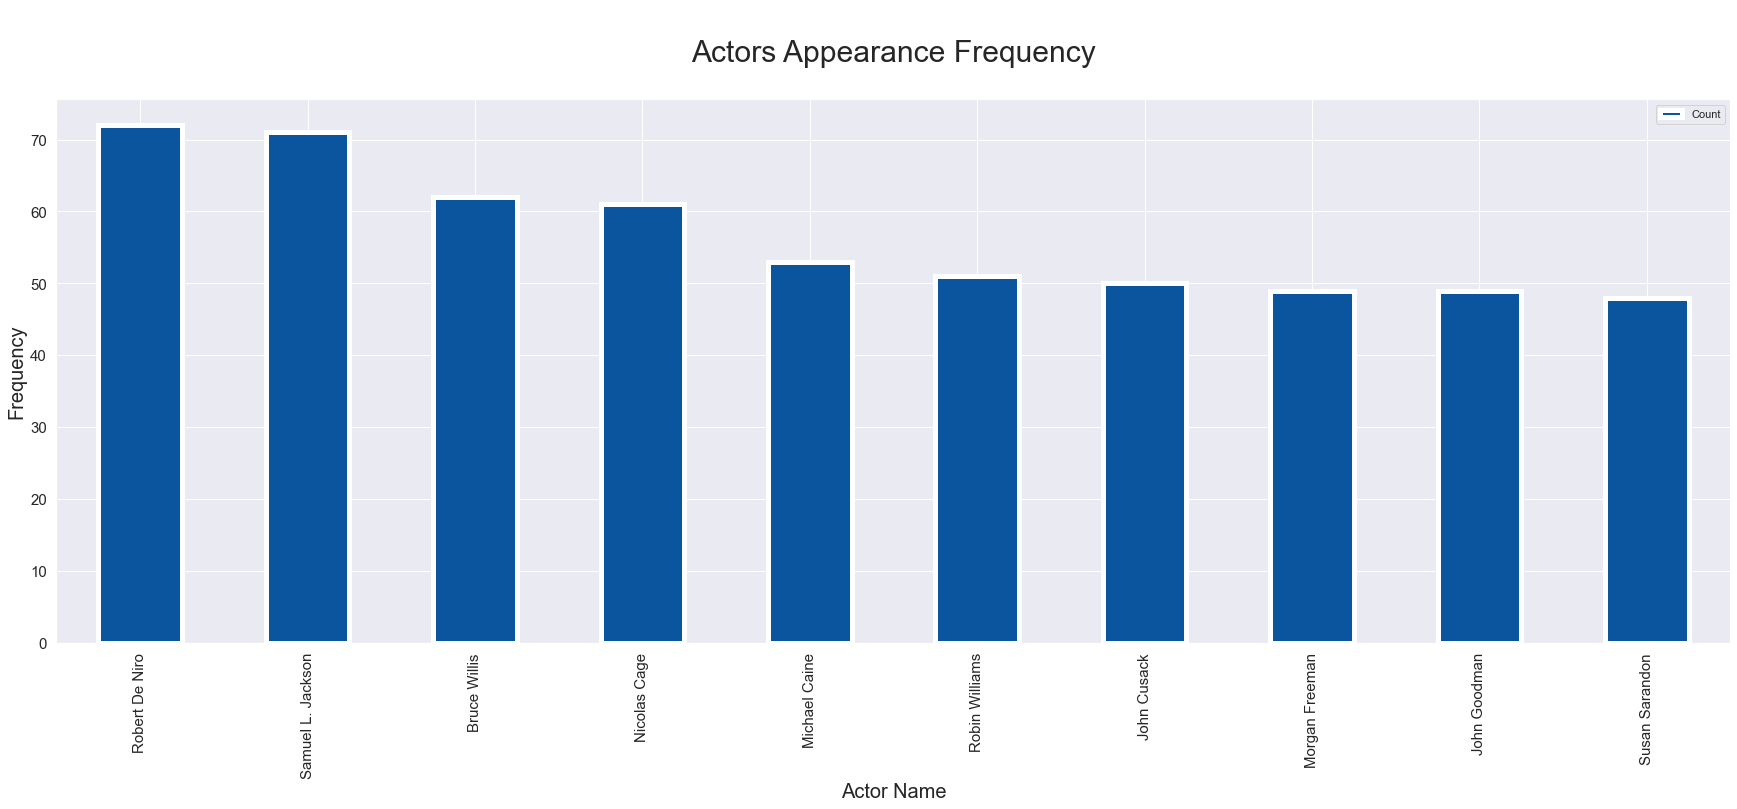

In [24]:
#concatenate all fields of cast column with '|'
cat_cast = df['Cast'].str.cat(sep = '|')

#split string with '|'  and create new series of actor names
splt_cast = pd.Series(cat_cast.split('|'))

#count values of actors
cast =splt_cast.value_counts(ascending=False)
cast=pd.DataFrame(cast).reset_index()
cast.rename(columns = {'index':'Actor', 0:'Count'}, inplace = True)
cast=cast[:10]

#plot data- call bar plot function
bar_Plot(cast,'Actor','Count','\nActors Appearance Frequency\n','Actor Name','Frequency', 'darkgrid','Blues_r')   

> <p>The chart shows a list of the top 10 actors, in the period between 1966-2015, with the number of movies they starred. On top of the list we find <strong>Robert De Niro</strong>. Other popular names also exist as <strong>Bruice Willis</strong>, <strong>Nicolas Cage</strong> and <strong>Robin Williams</strong>.</p>

<hr style="width:80%;margin-center:0;height:2px">

### Research Question 6 : Is there a relation between the profit of the movie and other attributes? i.e. budget, runtime, voting

In [25]:
#create a column to store profit data
df['Profit']= df['Revenue']-df['Budget']

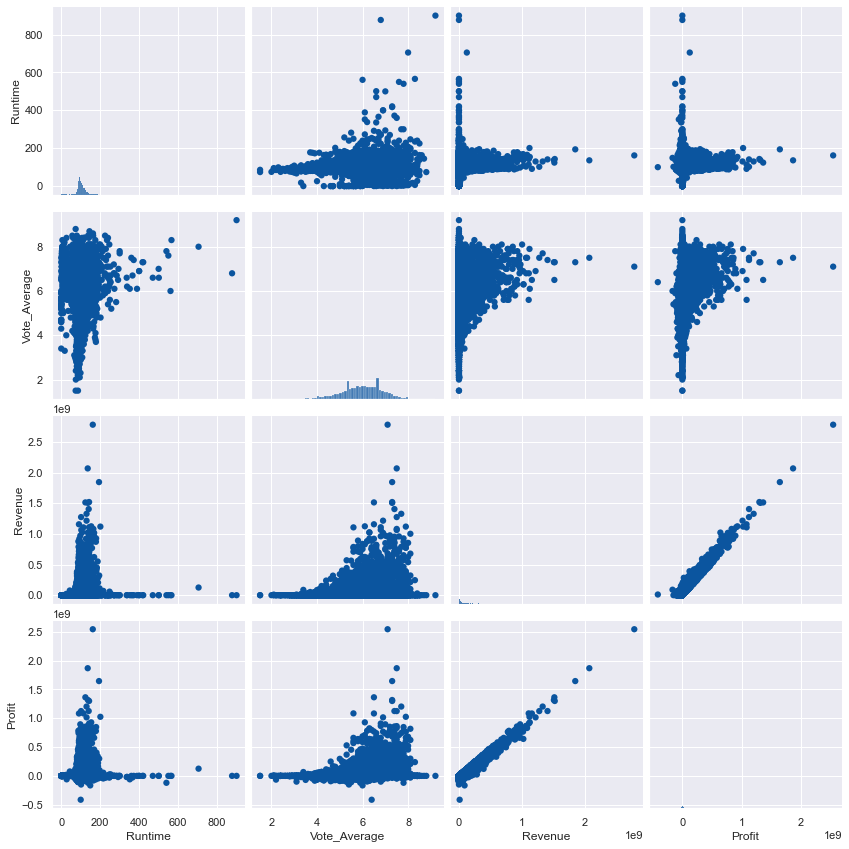

In [26]:
newdf= df[['Runtime','Vote_Average','Revenue','Profit']]
sns.set_theme(style='darkgrid', palette='Blues_r');
sns.pairplot(newdf,plot_kws={"s": 40,'edgecolor':'none'}, height=3);


> <p>As per the plot, longer movies didn't make as much profit as shorter ones. Besides, people gave higher votes for shorter movies. Also it's noticable that majority of movies made good profit with respect to their revenue.</p>

<hr style="width:90%;text-align:left;margin-center:0">

<a id='conclusions'></a>
## Conclusions

Based on the performed analysis, and with some observations from the visualizations I made, I liit my conclusion in the points below:
- People tend to prefer darama movies than other genres.
- The term <a href="https://movies.mxdwn.com/feature/dump-months-what-are-they-and-what-do-they-entail/">dump months</a>
   seems to be real! By checking the results of the movies' revenue per month, we can see that January, February, August and September have the lowest revenues in the year.
- From the analysis, I can observe that there was a drop in the number of movies released in 2010. By further research, we can discover the resason behind this.
- I can also conclude that "Robert De Niro" had the highest presence in the cast list during in th perion between (1966-2015), starring in over that 70 movies.
- And as for the relation profit and the run time, it shows that movies around 2 hours make the higest profit and get the highest watchers votes as well. 

## Limitations

#### Although the analysis went smooth, there might be some drawbacks in the analysis process.

For example, missing attributes lead to the deletion of some records amd losing some details. Also it would be nice to know in which country the movie got the highest revenu. Economic status might have impact on the reason of that drop in movie releases in 2015. 